<a href="https://colab.research.google.com/github/jumafernandez/SIyBD-UNTreF/blob/main/codigo/notebooks/arboles_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión: DecisionTreeClassifier

En esta notebook, compartimos el entrenamiento de un árbol de decisión con la librería *sklearn*.


En primer lugar, se cargan las librerías necesarias y el dataset desde el módulo `sklearn.datasets`:

In [2]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el dataset directamente desde sklearn
from sklearn.datasets import load_wine
wine_data = load_wine()

# Convertir a DataFrame y agregar nombres de columnas en español
nuevos_nombres = ["alcohol", "ácido_málico", "ceniza", "alcalinidad_de_la_ceniza",
                  "magnesio", "fenoles_totales", "flavonoides", "fenoles_no_flavonoides",
                  "proantocianidinas", "intensidad_de_color", "matiz",
                  "od280_od315_de_vinos_diluidos", "proline", "clase"]

wine = pd.DataFrame(data=wine_data.data, columns=nuevos_nombres[:-1])
wine["clase"] = wine_data.target

# Cambiar el orden de las columnas para que la clase esté al final
wine = wine[[col for col in wine.columns if col != 'clase'] + ['clase']]

Luego, se divide el dataset en entrenamiento y test:

In [4]:
# Dividir en conjunto de entrenamiento y test (70% entrenamiento, 30% test)
wine_train, wine_test = train_test_split(wine, test_size=0.3, random_state=1)

Se inicializa y entrena el árbol con los datos de entrenamiento:

In [5]:
# Entrenar el árbol de decisión (ID3 usando "entropy" como criterio)
arbol_1 = DecisionTreeClassifier(criterion='entropy')
arbol_1.fit(wine_train.drop(columns="clase"), wine_train["clase"])

DecisionTreeClassifier(criterion='entropy')

Se visualiza el árbol generado:

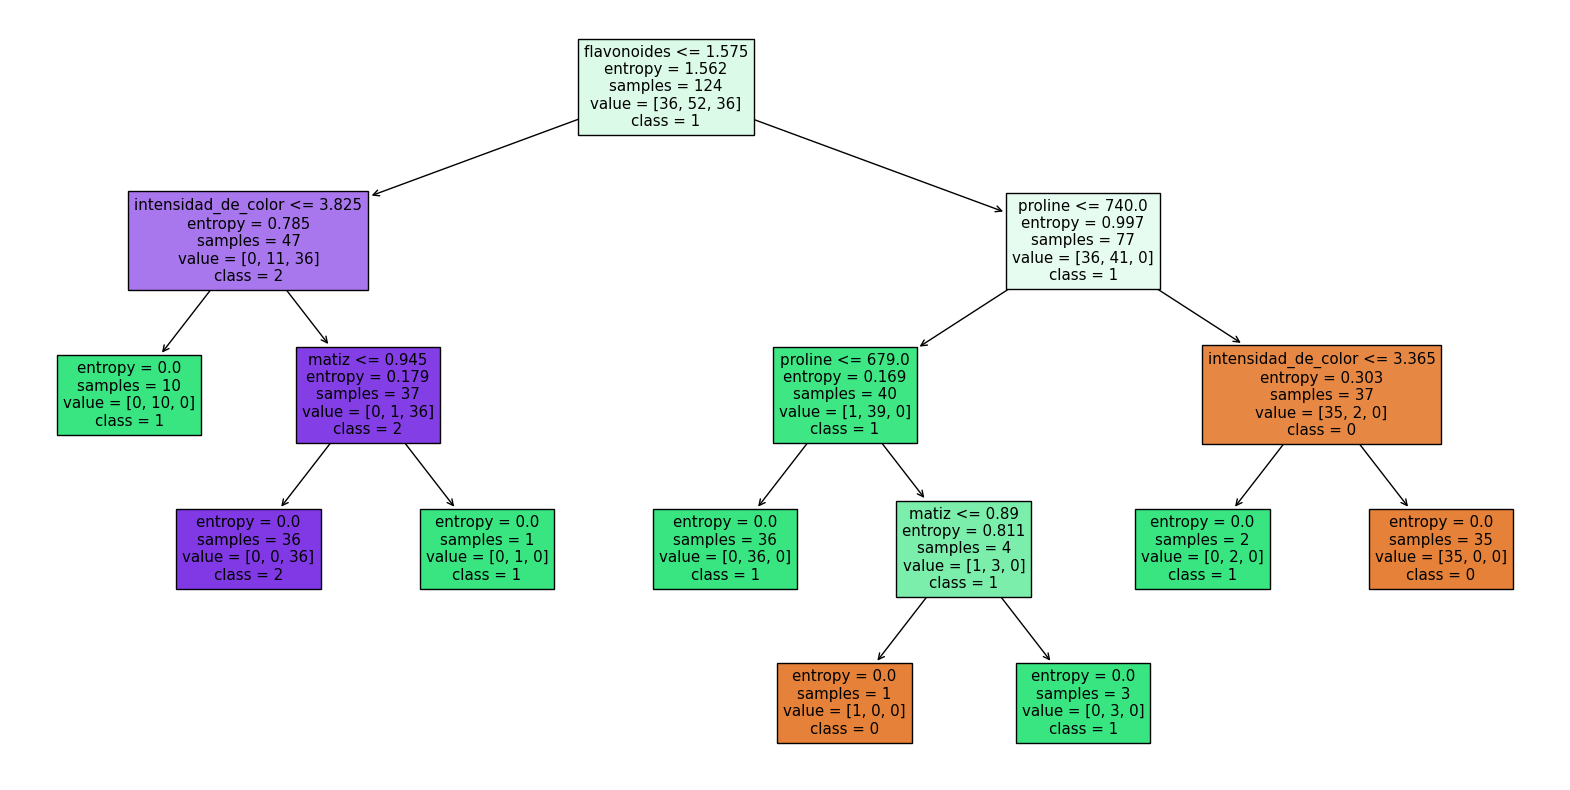

In [6]:
# Visualizar el árbol entrenado
plt.figure(figsize=(20,10))
tree.plot_tree(arbol_1, feature_names=wine.columns[:-1], class_names=[str(c) for c in set(wine["clase"])], filled=True)
plt.show()

Se valida la performance del árbol generado haciendo una predicción de las clases de los ejemplos de entrenamiento (eliminando la clase) y se grafica la martriz de confusión:

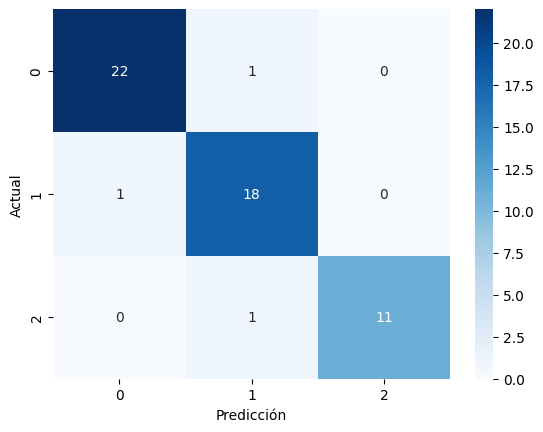

In [7]:
# Hacer predicciones sobre el conjunto de test
prediccion_1 = arbol_1.predict(wine_test.drop(columns="clase"))

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(wine_test["clase"], prediccion_1)
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

Por último, se imprime un reporte de performance de clasificación:

In [8]:
# Imprimir el reporte de clasificación
print(classification_report(wine_test["clase"], prediccion_1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.90      0.95      0.92        19
           2       1.00      0.92      0.96        12

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54

